# PROBLEM DEFINITION

This dataset contains road crash statistics from year 2013 to 2019 for the State of Victoria in Australia. This dataset is used to predict severe accidents and their contributing factors for the benefit of State Police, Department of Infrastructure & Transport. This can also be used by Car Insurance Companies for claims related risk factors evaluation. 

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from datetime import datetime

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# READ THE DATA

In [63]:
crash=pd.read_csv('/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Capstone/Crash Statistics Victoria.csv')
crash.head ()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,Monday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,...,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,Tuesday,PARKED VEHICLES ONLY,...,MELB_URBAN,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,MELB_URBAN,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,RURAL_VICTORIA,MITCHELL,NORTHERN REGION,M,M,Freeway,Freeway,Divided,Div,Country
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,Tuesday,U TURN,...,"MELBOURNE_CBD,MELB_URBAN",MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro


In [8]:
crash.columns

Index(['OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DAY_OF_WEEK', 'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION',
       'POLICE_ATTEND', 'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'LONGITUDE', 'LATITUDE', 'NODE_TYPE',
       'LGA_NAME', 'REGION_NAME', 'VICGRID_X', 'VICGRID_Y', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME',
       'DEG_URBAN_ALL', 'LGA_NAME_ALL', 'REGION_NAME_ALL', 'SRNS', 'SRNS_ALL',
       'RMA', 'RMA_ALL', 'DIVIDED', 'DIVIDED_ALL', 'S

In [9]:
crash.shape

(74908, 63)

# Target Feature

In [10]:
crash['SEVERITY']

0        Serious injury accident
1        Serious injury accident
2        Serious injury accident
3        Serious injury accident
4          Other injury accident
                  ...           
74903      Other injury accident
74904      Other injury accident
74905      Other injury accident
74906    Serious injury accident
74907      Other injury accident
Name: SEVERITY, Length: 74908, dtype: object

In [11]:
crash['SEVERITY']. unique()

array(['Serious injury accident', 'Other injury accident',
       'Fatal accident', 'Non injury accident'], dtype=object)

In [12]:
crash['SEVERITY'].value_counts()

Other injury accident      52032
Serious injury accident    21561
Fatal accident              1314
Non injury accident            1
Name: SEVERITY, dtype: int64

How do they measure the severity?
Check this site for more information: https://roadsafety.transport.nsw.gov.au/downloads/definitions-notes.pdf

This information is from NSW roadsafety transport documentation. So we asssume that the same severity assessment is done for VIC state as well.

High Threat to Life Indicator (HTTL): An alternative dimension of severity based on
a person’s probability of survival. This metric is based on a person’s worst injury
where the lowest SRR (Survival Risk Ratio) of all diagnosis codes for the first
admission is used to calculate ICISS (ICD-based Injury Severity Score). ICISS values
are banded into two categories and have the following survival probabilities:
Yes - at most 94.1%
No – at least 94.1%

Injury severity category: A dimension of severity based on a person’s probability of
survival. This metric is based on a person’s worst injury where the lowest SRR
(Survival Risk Ratio) of all diagnosis codes for the first admission is used to calculate
ICISS (ICD-based Injury Severity Score). ICISS values are banded into four
categories and have the following survival probabilities:
Maximum severity - at most 85.4%
High severity - between 85.4% and 96.5%
Moderate severity - between 96.5% and 99.2%
Minimum severity - at least 99.2%

# FEATURE DESCRIPTION

For this purpose, we will be referring to the crash stats user guide and appendices. 
https://data.vicroads.vic.gov.au/metadata/crashstats_user_guide_and_appendices.pdf

The original metadata can be accessed by:

https://data.vicroads.vic.gov.au/Metadata/Crash%20Stats%20-%20Data%20Extract%20-%20Open%20Data.html https://data.vicroads.vic.gov.au/metadata/Attribute_Table_Viewlist_7ac33a09.asp.html

In [8]:
crash.iloc[:,0]

0        3401744
1        3401745
2        3401746
3        3401747
4        3401748
          ...   
74903    3476647
74904    3476648
74905    3476649
74906    3476650
74907    3476651
Name: OBJECTID, Length: 74908, dtype: int64

In [8]:
len(crash.iloc[:,0])

74908

In [9]:
crash.iloc[:,0].unique()

array([3401744, 3401745, 3401746, ..., 3476649, 3476650, 3476651])

In [10]:
len(crash.iloc[:,0].unique())

74908

In [11]:
crash.iloc[:,1]

0        T20130013732
1        T20130013736
2        T20130013737
3        T20130013738
4        T20130013739
             ...     
74903    T20190001963
74904    T20190001967
74905    T20190001969
74906    T20190001978
74907    T20190001981
Name: ACCIDENT_NO, Length: 74908, dtype: object

In [12]:
crash.iloc[:,1].unique()

array(['T20130013732', 'T20130013736', 'T20130013737', ...,
       'T20190001969', 'T20190001978', 'T20190001981'], dtype=object)

In [13]:
crash.iloc[:,1].value_counts()

T20160007320    1
T20140001000    1
T20180011431    1
T20150025385    1
T20160000541    1
               ..
T20180017564    1
T20170019546    1
T20140015610    1
T20130019373    1
T20170002715    1
Name: ACCIDENT_NO, Length: 74908, dtype: int64

In [14]:
crash.iloc[:,2]

0        ABS to receive accident
1        ABS to receive accident
2        ABS to receive accident
3        ABS to receive accident
4        ABS to receive accident
                  ...           
74903    ABS to receive accident
74904    ABS to receive accident
74905    ABS to receive accident
74906    ABS to receive accident
74907    ABS to receive accident
Name: ABS_CODE, Length: 74908, dtype: object

In [15]:
crash.iloc[:,2].unique()

array(['ABS to receive accident'], dtype=object)

In [16]:
crash.iloc[:,4]

0         1/7/2013
1         2/7/2013
2         2/7/2013
3         2/7/2013
4         2/7/2013
           ...    
74903     1/2/2019
74904    31/1/2019
74905     7/1/2019
74906     1/2/2019
74907     1/2/2019
Name: ACCIDENT_DATE, Length: 74908, dtype: object

In [17]:
crash.iloc[:,4].unique()

array(['1/7/2013', '2/7/2013', '3/7/2013', ..., '29/1/2019', '22/1/2019',
       '21/1/2019'], dtype=object)

In [18]:
crash.iloc[:,4].value_counts()#How many accidents occur each day.

17/4/2015     77
29/4/2016     67
9/12/2015     67
4/12/2015     66
18/12/2014    64
              ..
15/3/2019      3
18/3/2019      2
21/3/2019      1
20/3/2019      1
19/3/2019      1
Name: ACCIDENT_DATE, Length: 2090, dtype: int64

In [19]:
crash.iloc[:,5]

0        18.30.00
1        16.40.00
2        13.15.00
3        16.45.00
4        15.48.00
           ...   
74903    13.55.00
74904    21.45.00
74905    09.30.00
74906    17.28.00
74907    18.44.00
Name: ACCIDENT_TIME, Length: 74908, dtype: object

In [20]:
crash['NODE_ID']
#The node id of the accident. It starts with 1 and incremented by one when a new accident location is indentified.

0        261534
1         66573
2        261533
3        263495
4        261664
          ...  
74903    341888
74904     46652
74905     36095
74906    343046
74907    342152
Name: NODE_ID, Length: 74908, dtype: int64

In [21]:
len(crash['NODE_ID'].unique()) #This means many accidents reported from same locations

57362

In [22]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74908 entries, 0 to 74907
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           74908 non-null  int64  
 1   ACCIDENT_NO        74908 non-null  object 
 2   ABS_CODE           74908 non-null  object 
 3   ACCIDENT_STATUS    74908 non-null  object 
 4   ACCIDENT_DATE      74908 non-null  object 
 5   ACCIDENT_TIME      74908 non-null  object 
 6   ALCOHOLTIME        74908 non-null  object 
 7   ACCIDENT_TYPE      74908 non-null  object 
 8   DAY_OF_WEEK        73432 non-null  object 
 9   DCA_CODE           74908 non-null  object 
 10  HIT_RUN_FLAG       74908 non-null  object 
 11  LIGHT_CONDITION    74908 non-null  object 
 12  POLICE_ATTEND      74908 non-null  object 
 13  ROAD_GEOMETRY      74908 non-null  object 
 14  SEVERITY           74908 non-null  object 
 15  SPEED_ZONE         74908 non-null  object 
 16  RUN_OFFROAD        749

# DATA CLEANING AND IMPUTATION

In [13]:
crash.isnull()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
74904,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
74905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
74906,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [14]:
crash.isna().sum().sum()

114053

In [15]:
null_list = crash.isna().sum().sort_values(ascending=False)
null_list

SRNS_ALL       53244
SRNS           53244
DIVIDED_ALL     1515
DIVIDED         1515
RMA_ALL         1515
               ...  
PASSENGER          0
BICYCLIST          0
FEMALES            0
NONINJURED         0
OBJECTID           0
Length: 63, dtype: int64

In [16]:
null_list_table = pd.DataFrame(data=null_list)
null_list_table.head(40)

,0
SRNS_ALL,53244
SRNS,53244
DIVIDED_ALL,1515
DIVIDED,1515
RMA_ALL,1515
RMA,1515
DAY_OF_WEEK,1476
NODE_TYPE,22
REGION_NAME_ALL,7
RUN_OFFROAD,0


In [17]:
is_NaN = crash.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = crash[row_has_NaN]
rows_with_NaN

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,Monday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,...,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,Tuesday,PARKED VEHICLES ONLY,...,MELB_URBAN,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,MELB_URBAN,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,Tuesday,U TURN,...,"MELBOURNE_CBD,MELB_URBAN",MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
5,3401749,T20130013740,ABS to receive accident,Finished,2/7/2013,13.40.00,No,Collision with a fixed object,Tuesday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,RURAL_VICTORIA,BAW BAW,"EASTERN REGION,EASTERN REGION",NaN,NaN,Local Road,Local Road,Undivided,Undiv,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74902,3476646,T20190001961,ABS to receive accident,Finished,1/2/2019,15.00.00,No,Collision with vehicle,Friday,RIGHT THROUGH,...,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undiv,Metro
74903,3476647,T20190001963,ABS to receive accident,Finished,1/2/2019,13.55.00,No,Collision with vehicle,Friday,OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148,...,MELB_URBAN,HUME,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Divided,"Div,Undiv",Metro
74904,3476648,T20190001967,ABS to receive accident,Finished,31/1/2019,21.45.00,Yes,Collision with a fixed object,Wednesday,OUT OF CONTROL (OVERTAKING),...,MELB_URBAN,YARRA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro
74905,3476649,T20190001969,ABS to receive accident,Finished,7/1/2019,09.30.00,No,Struck Pedestrian,Monday,ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DC...,...,MELB_URBAN,MELBOURNE,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undiv,Metro


What pecentage each feature that has significant amount of null values bear from the total dataset?

In [18]:
null_percentage= null_list*100/len(crash)
null_percentage

SRNS_ALL       71.079190
SRNS           71.079190
DIVIDED_ALL     2.022481
DIVIDED         2.022481
RMA_ALL         2.022481
                 ...    
PASSENGER       0.000000
BICYCLIST       0.000000
FEMALES         0.000000
NONINJURED      0.000000
OBJECTID        0.000000
Length: 63, dtype: float64

In [19]:
null_percentage_table = pd.DataFrame(data=null_percentage)
null_percentage_table.head(40)

,0
SRNS_ALL,71.079190
SRNS,71.079190
DIVIDED_ALL,2.022481
DIVIDED,2.022481
RMA_ALL,2.022481
RMA,2.022481
DAY_OF_WEEK,1.970417
NODE_TYPE,0.029369
REGION_NAME_ALL,0.009345
RUN_OFFROAD,0.000000


Some features that contain null values maynot be necessarily good enough to replace them with values. So it is better to drop columns. For example SRNS_all and SRNS- VicRoads has implemented a Statewide Route Numbering Scheme throughout rural Victoria. This is a simple route numbering system for rural freeways and arterial roads. Each road is given a letter and an identifying number. Bringing a feature that has very little information and on top of it adding replacement will cause significant biasness to the dataset as a whole. So decided to drop them. 

In [20]:
crash[['DIVIDED_ALL', 'DIVIDED','RMA_ALL','RMA','DAY_OF_WEEK','NODE_TYPE','REGION_NAME_ALL']]

,DIVIDED_ALL,DIVIDED,RMA_ALL,RMA,DAY_OF_WEEK,NODE_TYPE,REGION_NAME_ALL
0,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION
1,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION
2,Undiv,Undivided,Local Road,Local Road,Tuesday,Intersection,METROPOLITAN NORTH WEST REGION
3,Div,Divided,Freeway,Freeway,Tuesday,Non-Intersection,NORTHERN REGION
4,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,METROPOLITAN NORTH WEST REGION
...,...,...,...,...,...,...,...
74903,"Div,Undiv",Divided,Arterial Other,Arterial Other,Friday,Intersection,METROPOLITAN NORTH WEST REGION
74904,Undiv,Undivided,Local Road,Local Road,Wednesday,Intersection,METROPOLITAN NORTH WEST REGION
74905,Undiv,Undivided,Local Road,Local Road,Monday,Intersection,METROPOLITAN NORTH WEST REGION
74906,Div,Divided,Arterial Highway,Arterial Highway,Friday,Non-Intersection,METROPOLITAN SOUTH EAST REGION


In [21]:
crash.isna().sum().sum()

114053

By looking at the null contained feature columns, Frequent Categorical Imputation is necessary for the above features. Referring https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893#:~:text=Step%201%3A%20Find%20which%20category,and%20keep%20newly%20imputed%20columns
for this. 

Assumptions: Data is Missing At Random (MAR) and missing values look like the majority.
Description: Replacing NAN values with the most frequent occurred category in variable/column.
    
    Implementation:
Step 1: Find which category occurred most in each category using mode() Replace all NAN values in that column with that category.


In [22]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [23]:
#2. Call function to impute most occured category
for Columns in ['DIVIDED_ALL','DIVIDED','RMA_ALL','RMA','DAY_OF_WEEK','NODE_TYPE','REGION_NAME_ALL']:
    impute_nan_most_frequent_category(crash,Columns)

In [24]:
# Display imputed result
replace_table=crash[['DIVIDED_ALL','DIVIDED_ALL_Imputed','DIVIDED','DIVIDED_Imputed','RMA_ALL','RMA_ALL_Imputed','RMA','RMA_Imputed', 'DAY_OF_WEEK', 'DAY_OF_WEEK_Imputed','NODE_TYPE','NODE_TYPE_Imputed','REGION_NAME_ALL','REGION_NAME_ALL_Imputed']].head(10)
replace_table

,DIVIDED_ALL,DIVIDED_ALL_Imputed,DIVIDED,DIVIDED_Imputed,RMA_ALL,RMA_ALL_Imputed,RMA,RMA_Imputed,DAY_OF_WEEK,DAY_OF_WEEK_Imputed,NODE_TYPE,NODE_TYPE_Imputed,REGION_NAME_ALL,REGION_NAME_ALL_Imputed
0,Undiv,Undiv,Undivided,Undivided,Local Road,Local Road,Local Road,Local Road,Monday,Monday,Non-Intersection,Non-Intersection,METROPOLITAN NORTH WEST REGION,METROPOLITAN NORTH WEST REGION
1,"Div,Undiv","Div,Undiv",Divided,Divided,"Arterial Other,Local Road","Arterial Other,Local Road",Arterial Other,Arterial Other,Tuesday,Tuesday,Intersection,Intersection,METROPOLITAN SOUTH EAST REGION,METROPOLITAN SOUTH EAST REGION
2,Undiv,Undiv,Undivided,Undivided,Local Road,Local Road,Local Road,Local Road,Tuesday,Tuesday,Intersection,Intersection,METROPOLITAN NORTH WEST REGION,METROPOLITAN NORTH WEST REGION
3,Div,Div,Divided,Divided,Freeway,Freeway,Freeway,Freeway,Tuesday,Tuesday,Non-Intersection,Non-Intersection,NORTHERN REGION,NORTHERN REGION
4,Undiv,Undiv,Undivided,Undivided,Local Road,Local Road,Local Road,Local Road,Tuesday,Tuesday,Non-Intersection,Non-Intersection,METROPOLITAN NORTH WEST REGION,METROPOLITAN NORTH WEST REGION
5,Undiv,Undiv,Undivided,Undivided,Local Road,Local Road,Local Road,Local Road,Tuesday,Tuesday,Non-Intersection,Non-Intersection,"EASTERN REGION,EASTERN REGION","EASTERN REGION,EASTERN REGION"
6,"Div,Undiv","Div,Undiv",Divided,Divided,"Arterial Highway,Local Road","Arterial Highway,Local Road",Arterial Highway,Arterial Highway,Tuesday,Tuesday,Intersection,Intersection,METROPOLITAN SOUTH EAST REGION,METROPOLITAN SOUTH EAST REGION
7,Undiv,Undiv,Undivided,Undivided,Arterial Other,Arterial Other,Arterial Other,Arterial Other,Tuesday,Tuesday,Non-Intersection,Non-Intersection,METROPOLITAN SOUTH EAST REGION,METROPOLITAN SOUTH EAST REGION
8,Undiv,Undiv,Undivided,Undivided,Arterial Other,Arterial Other,Arterial Other,Arterial Other,Tuesday,Tuesday,Intersection,Intersection,METROPOLITAN SOUTH EAST REGION,METROPOLITAN SOUTH EAST REGION
9,"Div,Undiv","Div,Undiv",Divided,Divided,"Arterial Other,Local Road","Arterial Other,Local Road",Arterial Other,Arterial Other,Tuesday,Tuesday,Intersection,Intersection,METROPOLITAN SOUTH EAST REGION,METROPOLITAN SOUTH EAST REGION


In [25]:
crash.head()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,...,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,Monday,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,...,Undivided,Undiv,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,Tuesday,PARKED VEHICLES ONLY,...,Divided,"Div,Undiv",Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,Undivided,Undiv,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Intersection,METROPOLITAN NORTH WEST REGION
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,Tuesday,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,...,Divided,Div,Country,Div,Divided,Freeway,Freeway,Tuesday,Non-Intersection,NORTHERN REGION
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,Tuesday,U TURN,...,Undivided,Undiv,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,METROPOLITAN NORTH WEST REGION


In [26]:
replace_table.isna().sum().sum()

0

Step 3: Drop original columns and keep newly imputed columns.

In [27]:
#3. Drop actual columns
DataFrame = crash.drop(['DIVIDED_ALL','DIVIDED','RMA_ALL','RMA','DAY_OF_WEEK','NODE_TYPE','REGION_NAME_ALL'], axis = 1)

In [28]:
DataFrame.shape

(74908, 63)

In [29]:

DataFrame[['SRNS_ALL','SRNS']]

,SRNS_ALL,SRNS
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,M,M
4,NaN,NaN
...,...,...
74903,NaN,NaN
74904,NaN,NaN
74905,NaN,NaN
74906,NaN,NaN


Now these columns shoulded be imputed but dropped so that the data will not be very biased. Considering the type of data presented in these columns it may not be necessary to add them for analysis or modelling.

In [30]:
#Drop two  columns
crash_stat = DataFrame.drop(['SRNS_ALL','SRNS'], axis = 1)
crash_stat

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DCA_CODE,HIT_RUN_FLAG,...,DEG_URBAN_ALL,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,...,MELB_URBAN,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,PARKED VEHICLES ONLY,No,...,MELB_URBAN,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,MELB_URBAN,BRIMBANK,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Intersection,METROPOLITAN NORTH WEST REGION
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,RURAL_VICTORIA,MITCHELL,Country,Div,Divided,Freeway,Freeway,Tuesday,Non-Intersection,NORTHERN REGION
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,U TURN,No,...,"MELBOURNE_CBD,MELB_URBAN",MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,METROPOLITAN NORTH WEST REGION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74903,3476647,T20190001963,ABS to receive accident,Finished,1/2/2019,13.55.00,No,Collision with vehicle,OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148,No,...,MELB_URBAN,HUME,Metro,"Div,Undiv",Divided,Arterial Other,Arterial Other,Friday,Intersection,METROPOLITAN NORTH WEST REGION
74904,3476648,T20190001967,ABS to receive accident,Finished,31/1/2019,21.45.00,Yes,Collision with a fixed object,OUT OF CONTROL (OVERTAKING),No,...,MELB_URBAN,YARRA,Metro,Undiv,Undivided,Local Road,Local Road,Wednesday,Intersection,METROPOLITAN NORTH WEST REGION
74905,3476649,T20190001969,ABS to receive accident,Finished,7/1/2019,09.30.00,No,Struck Pedestrian,ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DC...,No,...,MELB_URBAN,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Intersection,METROPOLITAN NORTH WEST REGION
74906,3476650,T20190001978,ABS to receive accident,Finished,1/2/2019,17.28.00,Yes,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,MELB_URBAN,DANDENONG,Metro,Div,Divided,Arterial Highway,Arterial Highway,Friday,Non-Intersection,METROPOLITAN SOUTH EAST REGION


In [31]:
crash_stat.shape

(74908, 61)

In [32]:
crash_stat.columns

Index(['OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION', 'POLICE_ATTEND',
       'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE', 'RUN_OFFROAD', 'NODE_ID',
       'LONGITUDE', 'LATITUDE', 'LGA_NAME', 'REGION_NAME', 'VICGRID_X',
       'VICGRID_Y', 'TOTAL_PERSONS', 'INJ_OR_FATAL', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'UNKNOWN', 'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN',
       'OLD_DRIVER', 'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED',
       'NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE',
       'PUBLICVEHICLE', 'DEG_URBAN_NAME', 'DEG_URBAN_ALL', 'LGA_NAME_ALL',
       'STAT_DIV_NAME', 'DIVIDED_ALL_Imputed', 'DIVIDED_Imputed',
       'RMA_ALL_Imputed', 'RMA_Imputed', 'DAY_OF_WEEK_Imputed

In [33]:
crash_stat.isna().sum().sum()

0

Data is clean to proceed for the analysis and modelling.

The dataframe can be exported. That way it can be reused for modelling in a different notebook. 

In [34]:
crash_stat.to_csv (r'/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Capstone/Cleaned Crash Statistics Victoria.csv', index = False, header=True)

# DATA ANALYSIS

After careful consideration of each feature we have decided to conduct a comprehensive data analysis to understand road accident statistics in different contexts as follows. 

Overall understanding of the dataset and get a feel of the situations. For this particular task a certain predone analysis was referred https://github.com/NFaraji/An-analysis-of-Victoria-crash-data/blob/master/Insight-Crashes.ipynb
Other online resources have been used as needed.

In [35]:
#Getting the correlation of numerical features
correlation = crash_stat.corr().abs()
correlation 

,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,...,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
OBJECTID,1.000000,0.164805,0.008209,0.004762,0.008044,0.004766,0.002309,0.003709,0.003737,0.038289,...,0.002342,0.003163,0.013333,0.007652,0.005059,0.015159,0.007198,0.006408,0.001201,0.001353
NODE_ID,0.164805,1.000000,0.019063,0.059542,0.019057,0.058081,0.109412,0.018089,0.041780,0.068733,...,0.001506,0.007673,0.045292,0.028911,0.024650,0.131670,0.047735,0.123815,0.067983,0.013602
LONGITUDE,0.008209,0.019063,1.000000,0.179012,0.999872,0.176956,0.026106,0.022787,0.012732,0.010707,...,0.004785,0.009203,0.009525,0.015815,0.001222,0.016328,0.031885,0.029395,0.074762,0.001340
LATITUDE,0.004762,0.059542,0.179012,1.000000,0.186010,0.999914,0.043379,0.021363,0.041628,0.024135,...,0.006733,0.008609,0.008531,0.018746,0.004284,0.098868,0.027231,0.082354,0.029977,0.015327
VICGRID_X,0.008044,0.019057,0.999872,0.186010,1.000000,0.183934,0.025923,0.022777,0.012786,0.010345,...,0.004786,0.009211,0.009704,0.015772,0.001220,0.016042,0.031754,0.029270,0.074623,0.001193
VICGRID_Y,0.004766,0.058081,0.176956,0.999914,0.183934,1.000000,0.042754,0.020799,0.041059,0.023464,...,0.006693,0.008468,0.008366,0.018540,0.004102,0.097138,0.026777,0.080935,0.029411,0.015067
TOTAL_PERSONS,0.002309,0.109412,0.026106,0.043379,0.025923,0.042754,1.000000,0.478407,0.025816,0.075504,...,0.007849,0.013260,0.032098,0.160460,0.013244,0.516643,0.043360,0.484443,0.183275,0.125617
INJ_OR_FATAL,0.003709,0.018089,0.022787,0.021363,0.022777,0.020799,0.478407,1.000000,0.132347,0.319330,...,0.023937,0.025884,0.035004,0.086495,0.021911,0.162319,0.017522,0.211055,0.117431,0.043010
FATALITY,0.003737,0.041780,0.012732,0.041628,0.012786,0.041059,0.025816,0.132347,1.000000,0.047217,...,0.008425,0.040626,0.028073,0.017039,0.020469,0.027031,0.069663,0.030343,0.007052,0.007314
SERIOUSINJURY,0.038289,0.068733,0.010707,0.024135,0.010345,0.023464,0.075504,0.319330,0.047217,1.000000,...,0.007306,0.050229,0.044280,0.027028,0.031627,0.070711,0.021128,0.069814,0.060595,0.012767


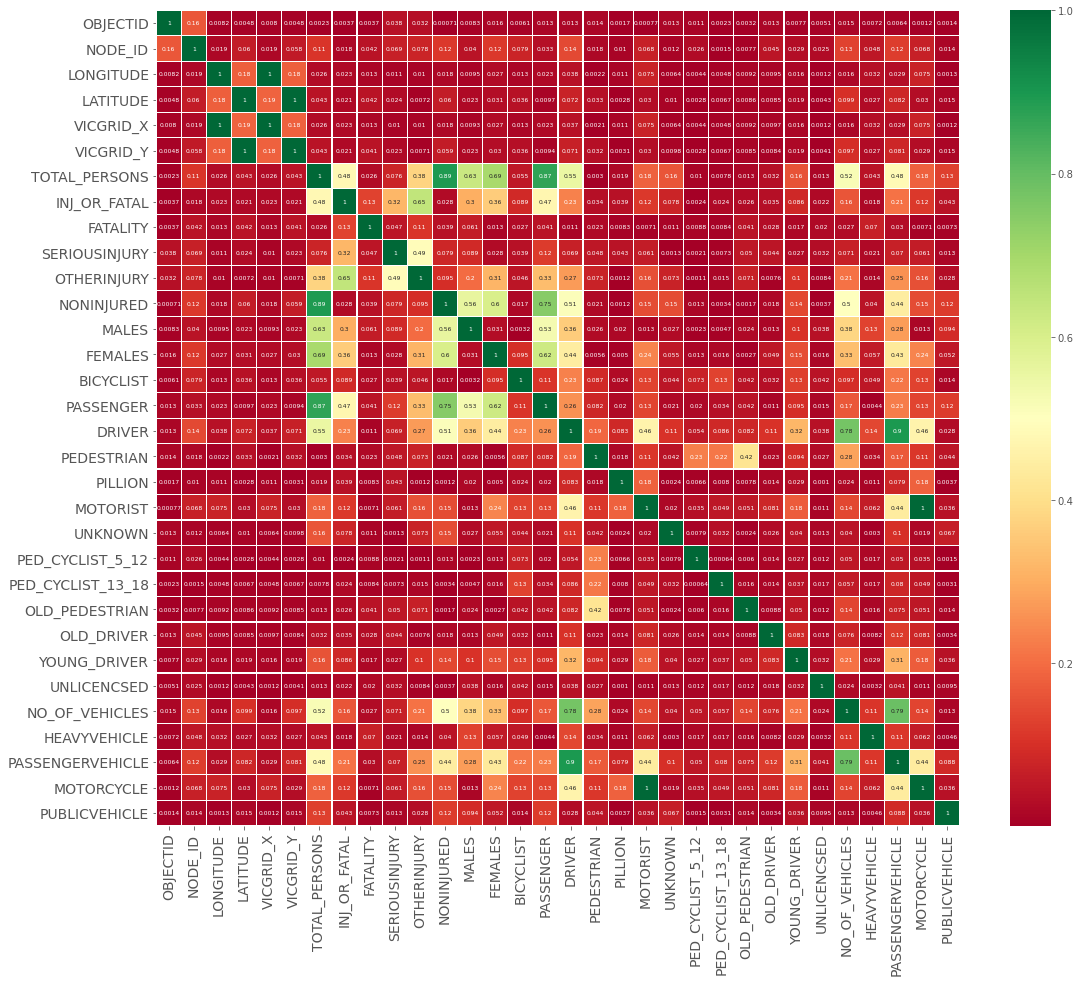

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':6})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
corr = crash_stat.corr() 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)
cld=pd.DataFrame(data=c1)
pd.set_option('display.max_colwidth', -1)
cld.head(1000)

<ipython-input-37-b48c640f6b15>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0
OBJECTID      OBJECTID       1.000000
              NODE_ID        0.164805
              LONGITUDE      0.008209
              LATITUDE       0.004762
              VICGRID_X      0.008044
...                               ...
PUBLICVEHICLE LATITUDE       0.015327
              VICGRID_X      0.001193
              VICGRID_Y      0.015067
              TOTAL_PERSONS  0.125617
              INJ_OR_FATAL   0.043010

[1000 rows x 1 columns]

<AxesSubplot:>

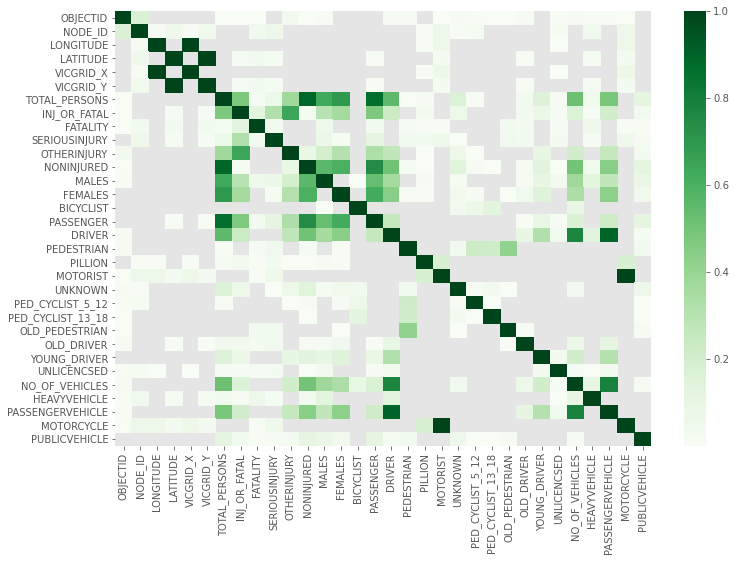

In [38]:
corr = crash_stat.corr()

kot = corr[corr>=.0005]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

Consider features that might have an impact on the severity of the accident. But in here we cannot find any interestingly correlating features to consider. 

Plotting time sensitive features

Inorder to plot timeseries over the years, the ACCIDENT_TIME and ACCIDENT_DATE should be concatinated to easily plot these graphs 

In [39]:
crash_stat['DATE_TIME'] = crash_stat['ACCIDENT_DATE'] + ' ' + crash_stat['ACCIDENT_TIME']

In [40]:
crash_stat["DATE_TIME"]= pd.to_datetime(crash_stat["DATE_TIME"], utc=True, format='%d/%m/%Y %H.%M.%S')

In [41]:
crash_stat["DATE_TIME"].dtypes

datetime64[ns, UTC]

In [42]:
crash_stat[['DATE_TIME']]

,DATE_TIME
0,2013-07-01 18:30:00+00:00
1,2013-07-02 16:40:00+00:00
2,2013-07-02 13:15:00+00:00
3,2013-07-02 16:45:00+00:00
4,2013-07-02 15:48:00+00:00
...,...
74903,2019-02-01 13:55:00+00:00
74904,2019-01-31 21:45:00+00:00
74905,2019-01-07 09:30:00+00:00
74906,2019-02-01 17:28:00+00:00


In [43]:
crash_stat[['DATE_TIME']].describe()

<ipython-input-43-cf0e1761b11c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  crash_stat[['DATE_TIME']].describe()


,DATE_TIME
count,74908
unique,68779
top,2015-03-20 17:00:00+00:00
freq,7
first,2013-07-01 02:10:00+00:00
last,2019-03-21 11:05:00+00:00


In [44]:
crash_stat.columns

Index(['OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION', 'POLICE_ATTEND',
       'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE', 'RUN_OFFROAD', 'NODE_ID',
       'LONGITUDE', 'LATITUDE', 'LGA_NAME', 'REGION_NAME', 'VICGRID_X',
       'VICGRID_Y', 'TOTAL_PERSONS', 'INJ_OR_FATAL', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'UNKNOWN', 'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN',
       'OLD_DRIVER', 'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED',
       'NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE',
       'PUBLICVEHICLE', 'DEG_URBAN_NAME', 'DEG_URBAN_ALL', 'LGA_NAME_ALL',
       'STAT_DIV_NAME', 'DIVIDED_ALL_Imputed', 'DIVIDED_Imputed',
       'RMA_ALL_Imputed', 'RMA_Imputed', 'DAY_OF_WEEK_Imputed

In [45]:
date_time_df = crash.groupby('ACCIDENT_DATE')
date_time_df.first()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,...,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed
ACCIDENT_DATE,,,,,,,,,,,,,,,,,,,,,
1/1/2014,3408239,T20140002921,ABS to receive accident,Finished,01.30.00,Yes,No collision and no object struck,Wednesday,OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT),No,...,Undivided,Undiv,Metro,Undiv,Undivided,Arterial Highway,Arterial Highway,Wednesday,Non-Intersection,METROPOLITAN NORTH WEST REGION
1/1/2015,3421318,T20150000031,ABS to receive accident,Finished,16.25.00,No,Vehicle overturned (no collision),Wednesday,OFF CARRIAGEWAY TO RIGHT,No,...,Undivided,Undiv,Country,Undiv,Undivided,Local Road,Local Road,Wednesday,Non-Intersection,"EASTERN REGION,EASTERN REGION"
1/1/2016,3436351,T20160000028,ABS to receive accident,Finished,11.35.00,No,Collision with vehicle,Friday,RIGHT NEAR (INTERSECTIONS ONLY),No,...,Divided,Div,Metro,Div,Divided,Arterial Other,Arterial Other,Friday,Intersection,METROPOLITAN SOUTH EAST REGION
1/1/2017,3450879,T20170001364,ABS to receive accident,Finished,14.30.00,No,Collision with vehicle,Sunday,REAR END(VEHICLES IN SAME LANE),No,...,Divided,"Div,Undiv",Country,"Div,Undiv",Divided,"Arterial Highway,Local Road",Arterial Highway,Friday,Intersection,SOUTH WESTERN REGION
1/1/2018,3462670,T20180000006,ABS to receive accident,Finished,00.02.00,Yes,Struck Pedestrian,Monday,PED PLAYING/LYING/WORKING/STANDING ON CARRIAGEWAY.,Yes,...,Undivided,Undiv,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/9/2014,3418452,T20140020777,ABS to receive accident,Finished,16.00.00,No,No collision and no object struck,Tuesday,OTHER ACCIDENTS NOT CLASSIFIABLE ELSEWHERE,No,...,Undivided,Undiv,Country,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,WESTERN REGION
9/9/2015,3431155,T20150018734,ABS to receive accident,Finished,05.35.00,Yes,Collision with vehicle,Wednesday,REAR END(VEHICLES IN SAME LANE),No,...,Divided,"Div,Undiv",Metro,"Div,Undiv",Divided,"Arterial Highway,Local Road",Arterial Highway,Wednesday,Intersection,METROPOLITAN SOUTH EAST REGION
9/9/2016,3445898,T20160019714,ABS to receive accident,Finished,08.40.00,No,Collision with vehicle,Friday,RIGHT THROUGH,No,...,Divided,"Div,Undiv",Metro,"Div,Undiv",Divided,"Arterial Highway,Local Road",Arterial Highway,Friday,Intersection,METROPOLITAN SOUTH EAST REGION


In [46]:
date_time_df['ACCIDENT_TIME'].count()

ACCIDENT_DATE
1/1/2014    32
1/1/2015    26
1/1/2016    36
1/1/2017    19
1/1/2018    14
            ..
9/9/2014    37
9/9/2015    41
9/9/2016    51
9/9/2017    34
9/9/2018    18
Name: ACCIDENT_TIME, Length: 2090, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accidents frequency of over the years')

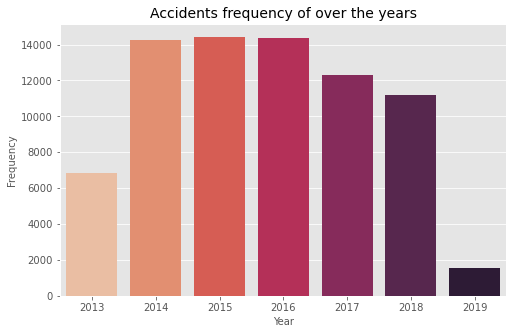

In [47]:
plt.figure(figsize=(8,5))
plot=sns.barplot(crash_stat.groupby(crash_stat.DATE_TIME.dt.year)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=crash_stat.groupby(crash_stat.DATE_TIME.dt.year)[['ACCIDENT_DATE']].count(), palette ='rocket_r', linewidth=2)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Accidents frequency of over the years', loc='Center', fontsize=14)

It seems year 2019 does not had many accidents reported or the data recorded are not correct. Year 2013 also shows significantly less number of accidents compared to other years (2014, 2015, 2016, 2017 & 2018). By the looks of it the number of accidents occurred during 2014-2016 is fairly close but from year 2017 the occurrances reduced. Could it be a reason within those year, road safety methods were applied to experience a significant reduce in accidents? The offset between 2013-2014 & the sudden drop in 2018-2019 caused because the data was not completed for those two years. Roughly they have data only for 3 months for the whole year. 

Further investigate the highest number of accident types occurred over the years.

In [48]:
 crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"]

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DCA_CODE,HIT_RUN_FLAG,...,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed,DATE_TIME
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,PARKED VEHICLES ONLY,No,...,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:40:00+00:00
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,U TURN,No,...,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-02 15:48:00+00:00
6,3401750,T20130013742,ABS to receive accident,Finished,2/7/2013,16.10.00,No,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,BAYSIDE,Metro,"Div,Undiv",Divided,"Arterial Highway,Local Road",Arterial Highway,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:10:00+00:00
7,3401751,T20130013743,ABS to receive accident,Finished,2/7/2013,17.50.00,No,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,BOROONDARA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Tuesday,Non-Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 17:50:00+00:00
8,3401752,T20130013744,ABS to receive accident,Finished,2/7/2013,17.30.00,No,Collision with vehicle,RIGHT THROUGH,No,...,BOROONDARA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 17:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74899,3476643,T20190001949,ABS to receive accident,Finished,1/2/2019,13.07.00,No,Collision with vehicle,RIGHT THROUGH,No,...,WHITEHORSE,Metro,Undiv,Undivided,"Arterial Other,Local Road",Arterial Other,Thursday,Intersection,METROPOLITAN SOUTH EAST REGION,2019-02-01 13:07:00+00:00
74900,3476644,T20190001953,ABS to receive accident,Finished,1/2/2019,11.15.00,No,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,WHITTLESEA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Friday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2019-02-01 11:15:00+00:00
74902,3476646,T20190001961,ABS to receive accident,Finished,1/2/2019,15.00.00,No,Collision with vehicle,RIGHT THROUGH,No,...,WYNDHAM,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Friday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2019-02-01 15:00:00+00:00
74903,3476647,T20190001963,ABS to receive accident,Finished,1/2/2019,13.55.00,No,Collision with vehicle,OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148,No,...,HUME,Metro,"Div,Undiv",Divided,Arterial Other,Arterial Other,Friday,Intersection,METROPOLITAN NORTH WEST REGION,2019-02-01 13:55:00+00:00


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Annual number of accidents occurred over the years due to Collision with vehicles ')

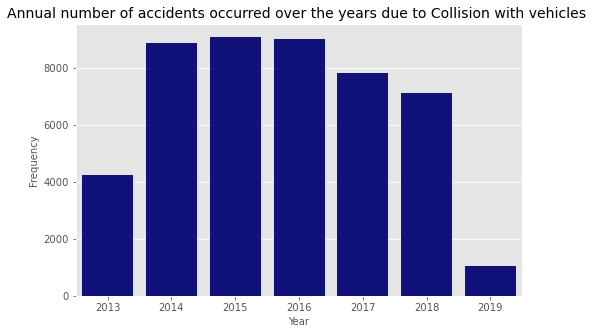

In [49]:
plt.figure(figsize=(8,5))
plot=sns.barplot(crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.year)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.year)[['ACCIDENT_DATE']].count(), color ='darkblue', linewidth=2)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Annual number of accidents occurred over the years due to Collision with vehicles ', loc='Center', fontsize=14)

In [50]:
groupedvalues = crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.year)[['ACCIDENT_TYPE']].count().reset_index()
# sum().reset_index()
groupedvalues

,DATE_TIME,ACCIDENT_TYPE
0,2013,4244
1,2014,8886
2,2015,9091
3,2016,9022
4,2017,7813
5,2018,7133
6,2019,1050


In [51]:
crash_stat['ACCIDENT_TYPE'].value_counts()

Collision with vehicle               47239
Collision with a fixed object        11774
Struck Pedestrian                    6621 
Vehicle overturned (no collision)    3713 
No collision and no object struck    3633 
Struck animal                        760  
collision with some other object     711  
Fall from or in moving vehicle       400  
Other accident                       57   
Name: ACCIDENT_TYPE, dtype: int64

In [52]:
acci_type_year=crash_stat[['DATE_TIME','ACCIDENT_TYPE']]
# df_acci_type_year = pd.DataFrame(data)
acci_type_year

,DATE_TIME,ACCIDENT_TYPE
0,2013-07-01 18:30:00+00:00,Struck Pedestrian
1,2013-07-02 16:40:00+00:00,Collision with vehicle
2,2013-07-02 13:15:00+00:00,Collision with a fixed object
3,2013-07-02 16:45:00+00:00,Collision with a fixed object
4,2013-07-02 15:48:00+00:00,Collision with vehicle
...,...,...
74903,2019-02-01 13:55:00+00:00,Collision with vehicle
74904,2019-01-31 21:45:00+00:00,Collision with a fixed object
74905,2019-01-07 09:30:00+00:00,Struck Pedestrian
74906,2019-02-01 17:28:00+00:00,Collision with vehicle


In [53]:
acci_t = crash_stat.groupby('ACCIDENT_TYPE')
acci_t.first()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,...,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed,DATE_TIME
ACCIDENT_TYPE,,,,,,,,,,,,,,,,,,,,,
Collision with a fixed object,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Day,...,BRIMBANK,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Intersection,METROPOLITAN NORTH WEST REGION,2013-07-02 13:15:00+00:00
Collision with vehicle,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,PARKED VEHICLES ONLY,No,Day,...,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:40:00+00:00
Fall from or in moving vehicle,3402028,T20130014462,ABS to receive accident,Finished,12/7/2013,19.30.00,Yes,FELL IN/FROM VEHICLE,No,Dark Street lights on,...,BAW BAW,Country,Undiv,Undivided,Local Road,Local Road,Friday,Non-Intersection,"EASTERN REGION,EASTERN REGION",2013-07-12 19:30:00+00:00
No collision and no object struck,3401764,T20130013769,ABS to receive accident,Finished,3/7/2013,00.54.00,Yes,OFF CARRIAGEWAY TO LEFT,No,Dark Street lights on,...,YARRA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Wednesday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-03 00:54:00+00:00
Other accident,3402273,T20130014882,ABS to receive accident,Finished,18/7/2013,15.45.00,No,OTHER ACCIDENTS NOT CLASSIFIABLE ELSEWHERE,No,Day,...,BAYSIDE,Metro,Undiv,Undivided,Local Road,Local Road,Thursday,Non-Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-18 15:45:00+00:00
Struck Pedestrian,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,Dark Street lights on,...,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-01 18:30:00+00:00
Struck animal,3401767,T20130013773,ABS to receive accident,Finished,3/7/2013,06.10.00,No,STRUCK ANIMAL,No,Dark No street lights,...,LATROBE,Country,Undiv,Undivided,Arterial Other,Arterial Other,Wednesday,Non-Intersection,"EASTERN REGION,EASTERN REGION",2013-07-03 06:10:00+00:00
Vehicle overturned (no collision),3401776,T20130013630,ABS to receive accident,Finished,1/7/2013,06.50.00,Yes,OFF CARRIAGEWAY TO RIGHT,No,Dark No street lights,...,MITCHELL,Country,Div,Divided,Freeway,Freeway,Sunday,Non-Intersection,NORTHERN REGION,2013-07-01 06:50:00+00:00
collision with some other object,3401856,T20130013955,ABS to receive accident,Finished,4/7/2013,21.58.00,Yes,STRUCK OBJECT ON CARRIAGEWAY,No,Dark No street lights,...,"MURRINDINDI,MURRINDINDI",Country,Undiv,Undivided,Arterial Other,Arterial Other,Thursday,Non-Intersection,NORTH EASTERN REGION,2013-07-04 21:58:00+00:00


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Accidents frequency of every month over the years')

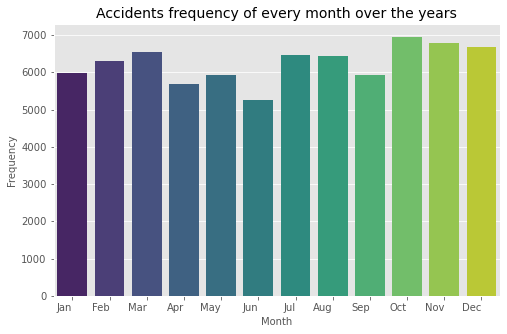

In [54]:
plt.figure(figsize=(8,5))
plot=sns.barplot(crash_stat.groupby(crash_stat.DATE_TIME.dt.month)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=crash_stat.groupby(crash_stat.DATE_TIME.dt.month)[['ACCIDENT_DATE']].count(), palette ='viridis', linewidth=2)
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plot.set_xticklabels(labels, horizontalalignment = 'right')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Accidents frequency of every month over the years', loc='Center', fontsize=14)

From year 2013-2019 the months that had most accidents are October, November, December, Feb, March, July and Auguest. Highest number of accidents occurred during seasons of holidays such as summer. It is advisable to investigate more into accident statistics during those months and figure out location, accident types

In [55]:
groupedvalues = crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.month)[['ACCIDENT_TYPE']].count().reset_index()
groupedvalues

,DATE_TIME,ACCIDENT_TYPE
0,1,3509
1,2,4139
2,3,4134
3,4,3532
4,5,3816
5,6,3286
6,7,4069
7,8,4115
8,9,3814
9,10,4400


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of accidents occurred monthly over the years due to Collision with vehicles')

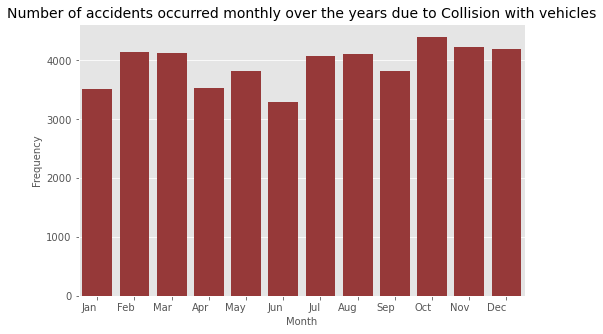

In [79]:
plt.figure(figsize=(8,5))
plot=sns.barplot(crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.month)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.month)[['ACCIDENT_DATE']].count(), color ='brown', linewidth=2)
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plot.set_xticklabels(labels, horizontalalignment = 'right')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Number of accidents occurred monthly over the years due to Collision with vehicles', loc='Center', fontsize=14)

In [56]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=30, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    
    chart = sns.barplot(x = plotdata.index, y=plotdata.values )
    chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='left')
    plt.title(title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()

In [57]:
crash_stat["DEG_URBAN_NAME"].value_counts()

MELB_URBAN                 47073
RURAL_VICTORIA             15819
LARGE_PROVINCIAL_CITIES    4219 
SMALL_CITIES               3794 
TOWNS                      2308 
MELBOURNE_CBD              1040 
SMALL_TOWNS                655  
Name: DEG_URBAN_NAME, dtype: int64

<AxesSubplot:title={'center':'Number of accidents occurred over the years in different areas of the state'}>

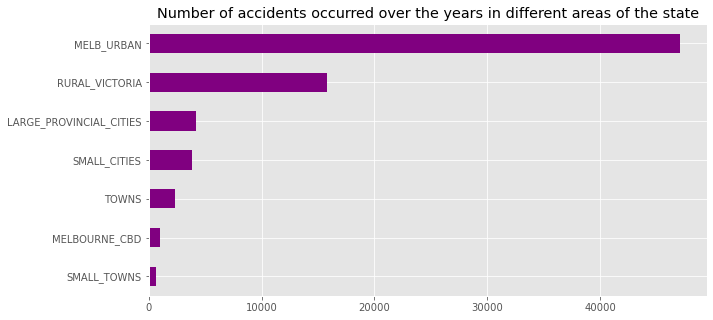

In [64]:
plt.figure(figsize=(10,5))
crash_stat.DEG_URBAN_NAME.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='purple', title="Number of accidents occurred over the years in different areas of the state")

It looks Melbourne urban areas and rural Victoria areas are more accident prone areas whereas surprisingly large provincial cities, melbourne CBDs are less accidently reported areas. Could it be that better traffic management, better road saftey management are highly operational in those areas? And in Melb surbarban areas are not given much attention in terms of effective road safety strategies. Could there be another reason for this massive accidents rate in suburban area?  

In [70]:
crash_stat['DEG_URBAN_ALL'].value_counts()

MELB_URBAN                                 46590
RURAL_VICTORIA                             15819
LARGE_PROVINCIAL_CITIES                    4158 
SMALL_CITIES                               3654 
TOWNS                                      2187 
MELBOURNE_CBD                              651  
SMALL_TOWNS                                600  
RURAL_VICTORIA,MELB_URBAN                  454  
MELBOURNE_CBD,MELB_URBAN                   389  
SMALL_CITIES,RURAL_VICTORIA                130  
TOWNS,RURAL_VICTORIA                       121  
RURAL_VICTORIA,LARGE_PROVINCIAL_CITIES     61   
SMALL_TOWNS,RURAL_VICTORIA                 55   
SMALL_TOWNS,MELB_URBAN                     29   
SMALL_TOWNS,SMALL_CITIES                   7    
SMALL_TOWNS,RURAL_VICTORIA,SMALL_CITIES    3    
Name: DEG_URBAN_ALL, dtype: int64

<AxesSubplot:title={'center':'Number of accidents occurred over the years in many different areas of the state'}>

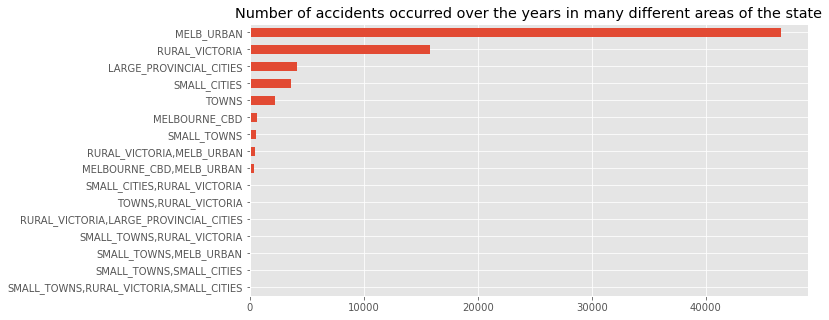

In [65]:
plt.figure(figsize=(10,5))

crash_stat.DEG_URBAN_ALL.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', title="Number of accidents occurred over the years in many different areas of the state")

The same pattern for the number of accidents can be seen in this plot as well

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hourly based accidents frequency')

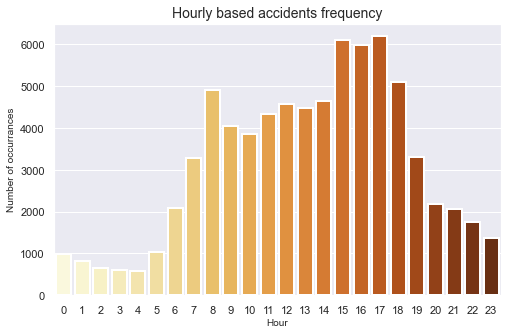

In [112]:
plt.figure(figsize=(8,5))
plot=sns.barplot(crash_stat.groupby(crash_stat.DATE_TIME.dt.hour)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=crash_stat.groupby(crash_stat.DATE_TIME.dt.hour)[['ACCIDENT_DATE']].count(), palette ='YlOrBr', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Number of occurrances', fontsize=10)
plt.title('Hourly based accidents frequency', loc='Center', fontsize=14)

During the day highest accidents could be recorded during 3 PM- 5 PM in the evening and followed by morning at 8 AM. It is evident that accidents are high when there are more traffic. So during the rush hours more accidents were recorded.

In [77]:
groupedvalues = crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.hour)[['ACCIDENT_TYPE']].count().reset_index()
groupedvalues

,DATE_TIME,ACCIDENT_TYPE
0,0,358
1,1,269
2,2,189
3,3,159
4,4,189
5,5,474
6,6,1311
7,7,2304
8,8,3554
9,9,2726


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of accidents occurred hourly over the years due to Collision with vehicles')

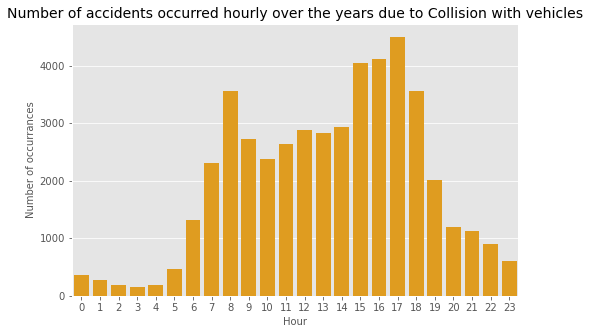

In [80]:
plt.figure(figsize=(8,5))
plot=sns.barplot(crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.hour)[['ACCIDENT_DATE']].count().index,
            'ACCIDENT_DATE', data=crash_stat[crash_stat['ACCIDENT_TYPE']=="Collision with vehicle"].groupby(crash_stat.DATE_TIME.dt.hour)[['ACCIDENT_DATE']].count(), color ='orange', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Number of occurrances', fontsize=10)
plt.title('Number of accidents occurred hourly over the years due to Collision with vehicles', loc='Center', fontsize=14)

In [74]:
week_df = crash_stat.groupby('DAY_OF_WEEK_Imputed')
week_df.first()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DCA_CODE,HIT_RUN_FLAG,...,DEG_URBAN_ALL,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed,DATE_TIME
DAY_OF_WEEK_Imputed,,,,,,,,,,,,,,,,,,,,,
Friday,3401849,T20130013937,ABS to receive accident,Finished,5/7/2013,06.15.00,No,Struck Pedestrian,PED PLAYING/LYING/WORKING/STANDING ON CARRIAGEWAY.,Yes,...,MELB_URBAN,CASEY,Metro,Div,Divided,Arterial Highway,Arterial Highway,Non-Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-05 06:15:00+00:00
Monday,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,...,MELB_URBAN,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-01 18:30:00+00:00
Saturday,3401822,T20130014022,ABS to receive accident,Finished,6/7/2013,13.04.00,No,Struck Pedestrian,FAR SIDE. PED HIT BY VEHICLE FROM THE LEFT,No,...,MELB_URBAN,HOBSONS BAY,Metro,Undiv,Undivided,Local Road,Local Road,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-06 13:04:00+00:00
Sunday,3401776,T20130013630,ABS to receive accident,Finished,1/7/2013,06.50.00,Yes,Vehicle overturned (no collision),OFF CARRIAGEWAY TO RIGHT,No,...,RURAL_VICTORIA,MITCHELL,Country,Div,Divided,Freeway,Freeway,Non-Intersection,NORTHERN REGION,2013-07-01 06:50:00+00:00
Thursday,3401814,T20130013852,ABS to receive accident,Finished,4/7/2013,00.20.00,Yes,Collision with a fixed object,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,LARGE_PROVINCIAL_CITIES,BALLARAT,Country,Div,Divided,Arterial Other,Arterial Other,Non-Intersection,WESTERN REGION,2013-07-04 00:20:00+00:00
Tuesday,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,PARKED VEHICLES ONLY,No,...,MELB_URBAN,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:40:00+00:00
Wednesday,3401764,T20130013769,ABS to receive accident,Finished,3/7/2013,00.54.00,Yes,No collision and no object struck,OFF CARRIAGEWAY TO LEFT,No,...,MELB_URBAN,YARRA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-03 00:54:00+00:00


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of accidents per Day of the Week')

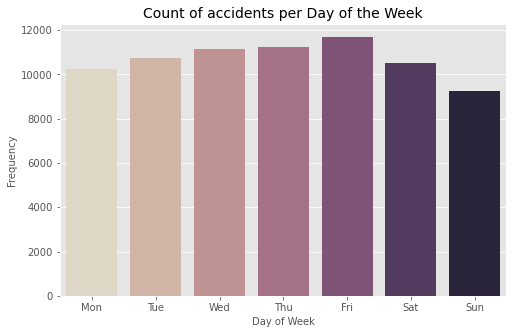

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(crash_stat.groupby(crash_stat.DATE_TIME.dt.weekday)[['DAY_OF_WEEK_Imputed']].count().index, 'DAY_OF_WEEK_Imputed', 
            data=crash_stat.groupby(crash_stat.DATE_TIME.dt.weekday)[['DAY_OF_WEEK_Imputed']].count(), palette='ch:s=-.2,r=.6', linewidth=2)
plt.xticks(crash_stat.groupby(crash_stat.DATE_TIME.dt.weekday)[['DAY_OF_WEEK_Imputed']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Count of accidents per Day of the Week', loc='Center', fontsize=14)

From the plot it is clear that during Friday, that is the beginning of the weekend there were many accidents reported as it well could be that Friday usually is a busy day for any city country wide specially during the evening hours. Sunday reported to have less accidents there weren't many people on the road. 

Accident types

In [76]:
df=crash_stat.groupby('ACCIDENT_TYPE')
df.first()

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,...,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed,DATE_TIME
ACCIDENT_TYPE,,,,,,,,,,,,,,,,,,,,,
Collision with a fixed object,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Day,...,BRIMBANK,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Intersection,METROPOLITAN NORTH WEST REGION,2013-07-02 13:15:00+00:00
Collision with vehicle,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,PARKED VEHICLES ONLY,No,Day,...,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:40:00+00:00
Fall from or in moving vehicle,3402028,T20130014462,ABS to receive accident,Finished,12/7/2013,19.30.00,Yes,FELL IN/FROM VEHICLE,No,Dark Street lights on,...,BAW BAW,Country,Undiv,Undivided,Local Road,Local Road,Friday,Non-Intersection,"EASTERN REGION,EASTERN REGION",2013-07-12 19:30:00+00:00
No collision and no object struck,3401764,T20130013769,ABS to receive accident,Finished,3/7/2013,00.54.00,Yes,OFF CARRIAGEWAY TO LEFT,No,Dark Street lights on,...,YARRA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Wednesday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-03 00:54:00+00:00
Other accident,3402273,T20130014882,ABS to receive accident,Finished,18/7/2013,15.45.00,No,OTHER ACCIDENTS NOT CLASSIFIABLE ELSEWHERE,No,Day,...,BAYSIDE,Metro,Undiv,Undivided,Local Road,Local Road,Thursday,Non-Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-18 15:45:00+00:00
Struck Pedestrian,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,Dark Street lights on,...,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-01 18:30:00+00:00
Struck animal,3401767,T20130013773,ABS to receive accident,Finished,3/7/2013,06.10.00,No,STRUCK ANIMAL,No,Dark No street lights,...,LATROBE,Country,Undiv,Undivided,Arterial Other,Arterial Other,Wednesday,Non-Intersection,"EASTERN REGION,EASTERN REGION",2013-07-03 06:10:00+00:00
Vehicle overturned (no collision),3401776,T20130013630,ABS to receive accident,Finished,1/7/2013,06.50.00,Yes,OFF CARRIAGEWAY TO RIGHT,No,Dark No street lights,...,MITCHELL,Country,Div,Divided,Freeway,Freeway,Sunday,Non-Intersection,NORTHERN REGION,2013-07-01 06:50:00+00:00
collision with some other object,3401856,T20130013955,ABS to receive accident,Finished,4/7/2013,21.58.00,Yes,STRUCK OBJECT ON CARRIAGEWAY,No,Dark No street lights,...,"MURRINDINDI,MURRINDINDI",Country,Undiv,Undivided,Arterial Other,Arterial Other,Thursday,Non-Intersection,NORTH EASTERN REGION,2013-07-04 21:58:00+00:00


<AxesSubplot:title={'center':'Accident types occurred over the years'}>

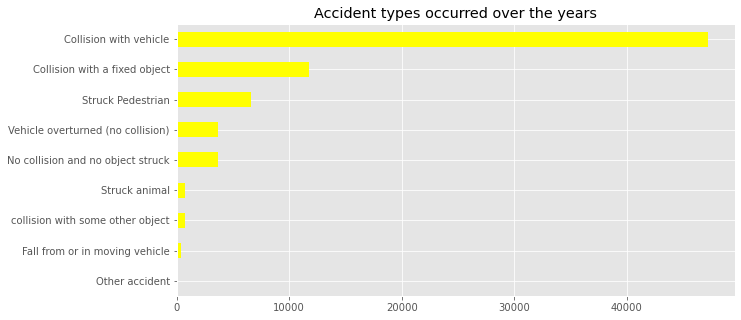

In [93]:
# plot_categorical(crash_stat, col='ACCIDENT_TYPE', size=[10 ,6], title='Type of accidents')
plt.figure(figsize=(10,5))

crash_stat.ACCIDENT_TYPE.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='yellow', title='Accident types occurred over the years')

From the plot above, it seems that collision with vehicles is the main type of accident rerported in whole Victoria state. The collision with a fixed object is the second highest reported. 

<AxesSubplot:title={'center':'Light condition when accidents occurred over the years'}>

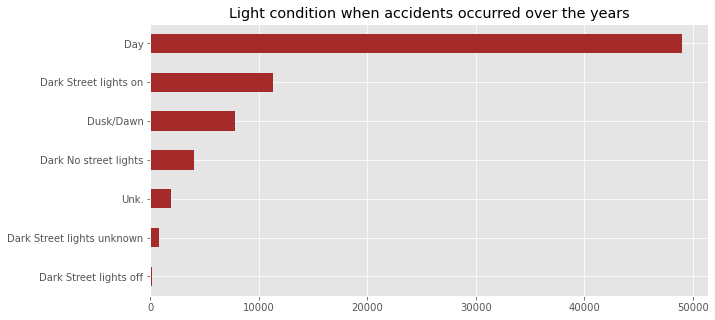

In [94]:
plt.figure(figsize=(10,5))

crash_stat.LIGHT_CONDITION.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='brown', title='Light condition when accidents occurred over the years')

Interestingly, most of the accidents occurred during the day time. Which implies that it could well happened when there was a lot of traffic on the road during the day time. When people are active on the road.

<AxesSubplot:title={'center':'Road geometry of the places when accidents occurred'}>

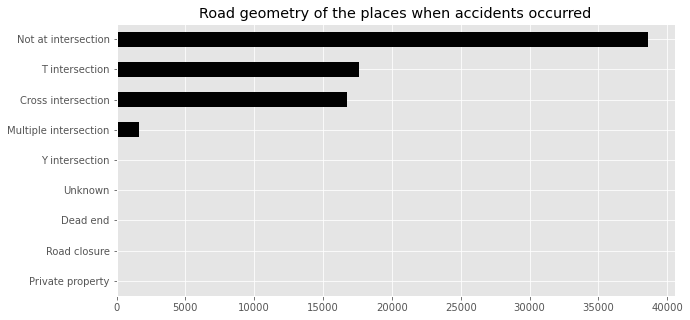

In [96]:
plt.figure(figsize=(10,5))

crash_stat.ROAD_GEOMETRY.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='black',title='Road geometry of the places when accidents occurred')

Most of the accidents have occurred non intersection areas. Could this mean that at intersection, there are more traffic control happening whereas in non-intersect areas are prone to accidents.

<AxesSubplot:title={'center':'Speed limit of the area when accidents occurred'}>

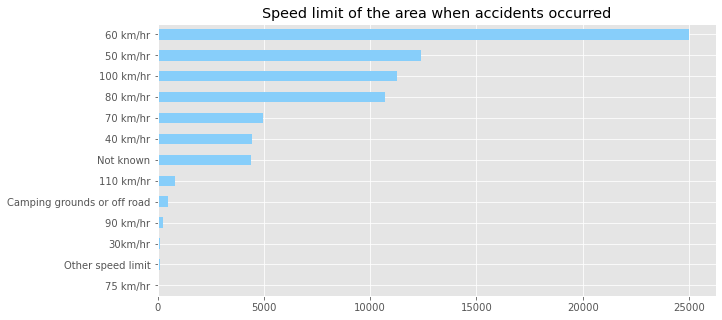

In [97]:
plt.figure(figsize=(10,5))

crash_stat.SPEED_ZONE.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='lightskyblue', title='Speed limit of the area when accidents occurred')

It seems most of the cases accidents have happened at 60km/hr speed limit. And Second highest is 50km/hr. Could this mean these accidents occur due to speeding in low speed zones, especially in Melbourne urban areas?

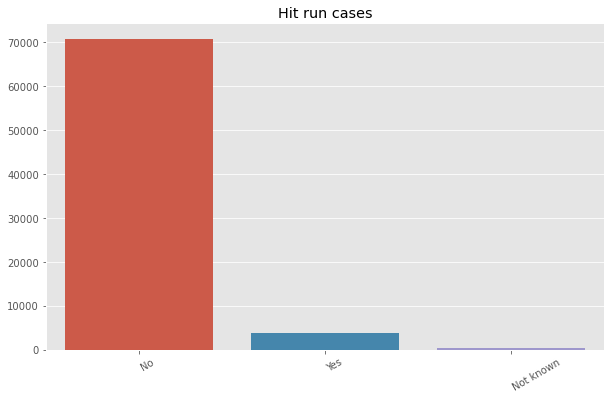

In [81]:
plot_categorical(crash_stat, col='HIT_RUN_FLAG', size=[10 ,6], title='Hit run cases')

Most of the cases aren't hit and run accidents. 

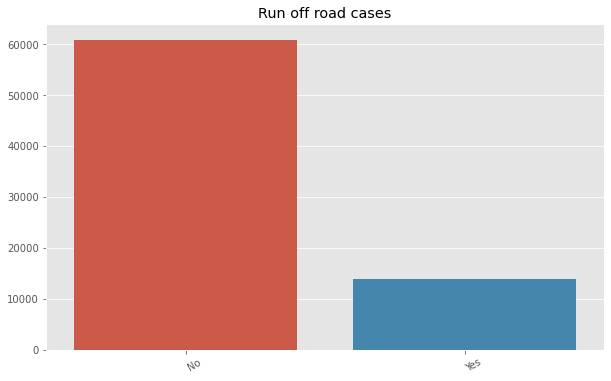

In [82]:
plot_categorical(crash_stat, col='RUN_OFFROAD', size=[10 ,6], title='Run off road cases')

Most of the cases aren't run off road accidents. Most of the vehicle accident types occurred through collision but there is a significant number of accidents have collision with objects but this can also mean they are not off road. Mostly near the road or on the road

<AxesSubplot:title={'center':'Accidents occurred in Victorian regions'}>

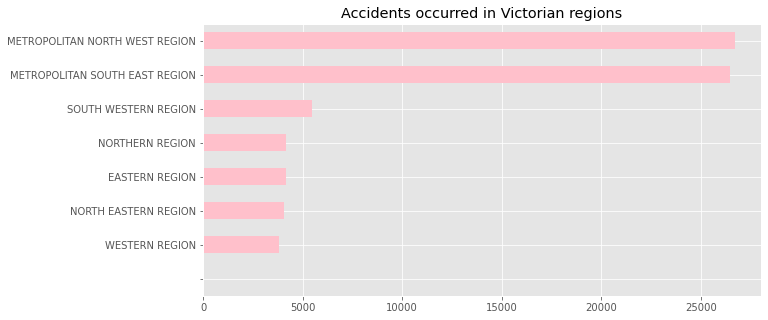

In [83]:
plt.figure(figsize=(10,5))

crash_stat.REGION_NAME.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='pink', title='Accidents occurred in Victorian regions')

Lot of accidents happened in Metropolitan North West region as well as Metropolitan South East Region. 

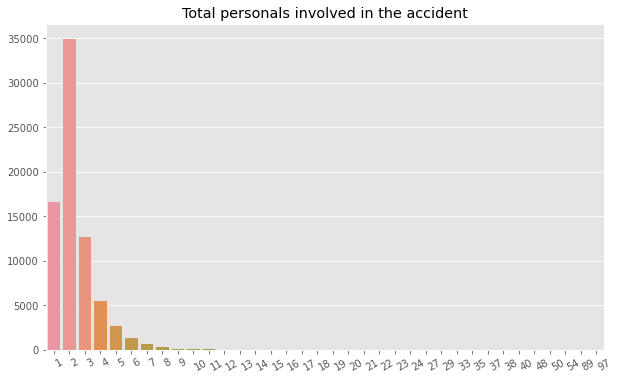

In [84]:
plot_categorical(crash_stat, col='TOTAL_PERSONS', size=[10 ,6], title='Total personals involved in the accident')

It seems only a few people involved in an accident no more than 5 people. But more number of accidents have two personals involved in the accident and if it a collision with another vehicle when it could be the two drivers of the two vehicles. Involving one person could be a collision with a fixed object. 

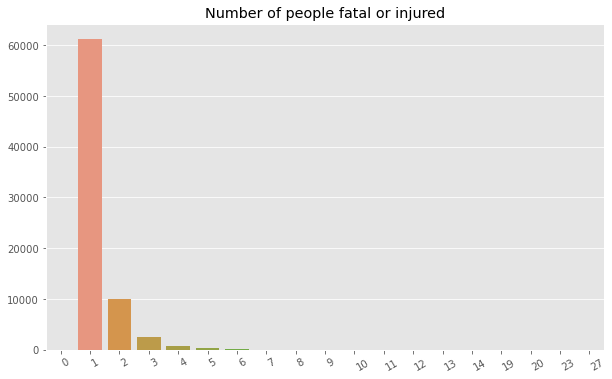

In [85]:
plot_categorical(crash_stat, col='INJ_OR_FATAL', size=[10 ,6], title='Number of people fatal or injured')

Most of the time only one person is injured or been fataly injured. 

The next two plots-severity plots and folium map are based on the insights from 
https://github.com/NFaraji/An-analysis-of-Victoria-crash-data/blob/master/Insight-Crashes.ipynb

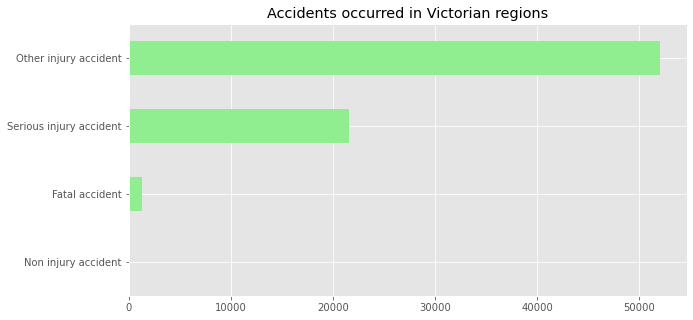

In [86]:
plt.figure(figsize=(10,5))

crash_stat.SEVERITY.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='lightgreen', title='Accidents occurred in Victorian regions')

plt.show()

Text(0, 0.5, 'Count')

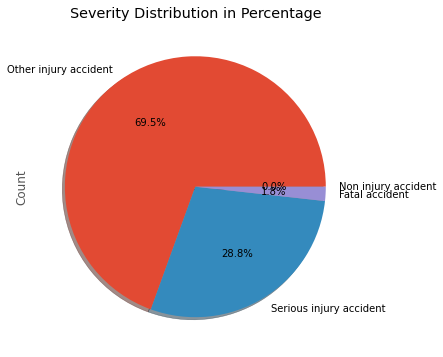

In [85]:
# Using matplotlib

plt.figure(figsize=(10,6))


crash_stat['SEVERITY'].value_counts().plot.pie(explode=[0,0,0,0],autopct='%0.1f%%',shadow=True)
plt.title('Severity Distribution in Percentage')
plt.ylabel('Count')


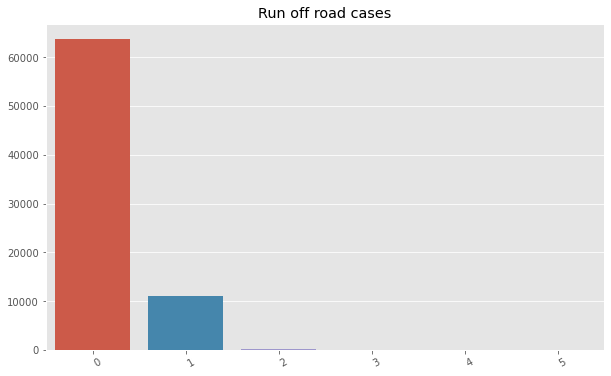

In [90]:
plot_categorical(crash_stat, col='MOTORCYCLE', size=[10 ,6], title='Run off road cases')

In [76]:
def createBaseMap(default_location=[-37.82202,144.96980 ], default_zoom_start=12):#Starting from index 0 as default location
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [77]:
crash_stat[['LATITUDE','LONGITUDE']]

,LATITUDE,LONGITUDE
0,-37.82202,144.96980
1,-37.83166,145.14671
2,-37.74003,144.80134
3,-37.17891,145.07011
4,-37.81808,144.96530
...,...,...
74903,-37.64501,144.96209
74904,-37.80851,144.99937
74905,-37.80053,144.94590
74906,-37.95881,145.18532


In [78]:
for i in range(0, 10):
    print([crash_stat.iloc[i]['LATITUDE'], crash_stat.iloc[i]['LONGITUDE']], crash_stat.iloc[i]['SEVERITY'])

[-37.82202, 144.9698] Serious injury accident
[-37.83166, 145.14671] Serious injury accident
[-37.74003, 144.80133999999998] Serious injury accident
[-37.178909999999995, 145.07011] Serious injury accident
[-37.81808, 144.9653] Other injury accident
[-38.23087, 145.7914] Serious injury accident
[-37.90637, 145.00873] Other injury accident
[-37.80207, 145.07228999999998] Other injury accident
[-37.82156, 145.02638000000002] Other injury accident
[-37.84541, 145.15438999999998] Other injury accident


In [79]:
state_location = [-37.82202, 144.96980 ]
m = createBaseMap(default_location=state_location)

In [80]:
# add marker one by one on the map
for i in range(0, len(crash_stat.head(300))):
    folium.Marker(location=[crash_stat.iloc[i]['LATITUDE'], crash_stat.iloc[i]['LONGITUDE']], popup=crash_stat.iloc[i]['SEVERITY'] 
                  ).add_to(m)

# Show the map
m

According to the folium map, the accidents have occurred statewide and scattered specially among outskirt suburbs of Victoria. A significant density of accidents can be seen in the CBD area but most of accidents are at the outskirts of the city.

In [93]:
df_gender = crash_stat[['MALES','FEMALES']]
df_gender

,MALES,FEMALES
0,2,1
1,1,1
2,1,0
3,1,2
4,3,0
...,...,...
74903,5,2
74904,1,0
74905,1,1
74906,2,1


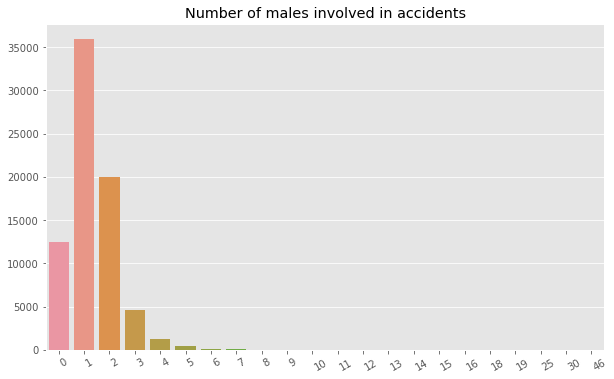

In [94]:
plot_categorical(crash_stat, col='MALES', size=[10 ,6], title='Number of males involved in accidents')

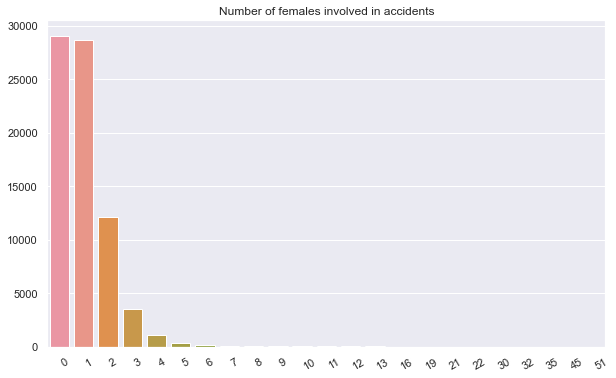

In [111]:
plot_categorical(crash_stat, col='FEMALES', size=[10 ,6], title='Number of females involved in accidents')

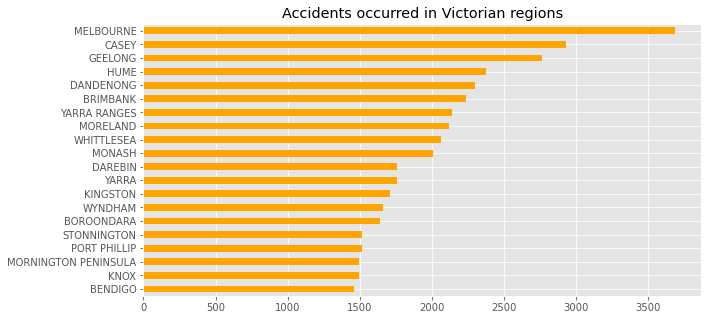

In [96]:
plt.figure(figsize=(10,5))

crash_stat.LGA_NAME_ALL.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='orange', title='Accidents occurred in Victorian regions')

plt.show()

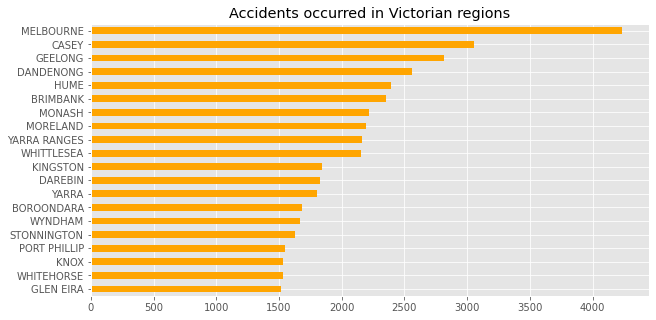

In [97]:
plt.figure(figsize=(10,5))

crash_stat.LGA_NAME.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh', color='orange', title='Accidents occurred in Victorian regions')

plt.show()